In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pybaseball import statcast
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup

In [3]:
# Player ID 
steele_id = 657006
#playerid_lookup('steele', 'justin')
# 2023 Season Data for Steele
data_23 = statcast_pitcher('2023-01-01', '2023-05-11', player_id=steele_id)

Gathering Player Data


In [13]:
# Group by zone and calculate mean delta_run_exp for each zone
zone_values = data_23.groupby('zone')['delta_run_exp'].sum()

In [14]:
zone_values.shape

(13,)

In [15]:
zone_matrix = zone_values[1:10].values.reshape((3,3))

In [16]:
zone_matrix = zone_matrix.T

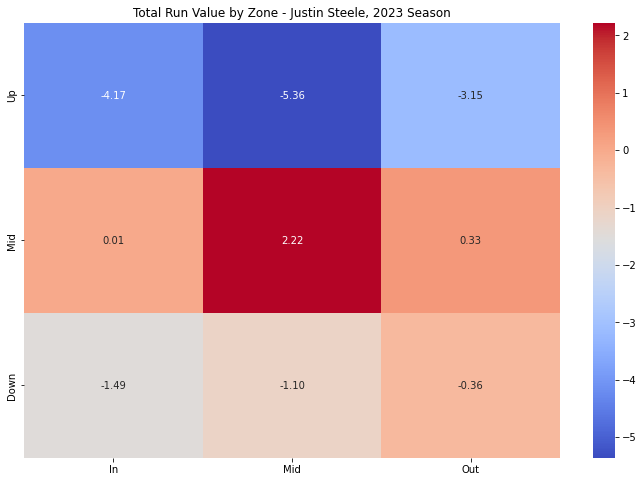

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(zone_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', xticklabels=['In', 'Mid', 'Out'], yticklabels=['Up', 'Mid', 'Down'])
plt.title('Total Run Value by Zone - Justin Steele, 2023 Season')
plt.show()

In [21]:
# Filter for 4-seam fastball and slider
pitches = data_23[data_23['pitch_type'].isin(['FF', 'SL'])]
pitches.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [27]:
pitch_types = pitches['pitch_type'].unique()

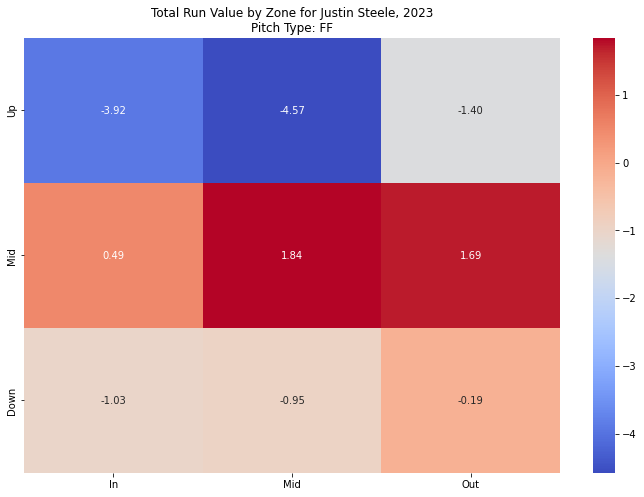

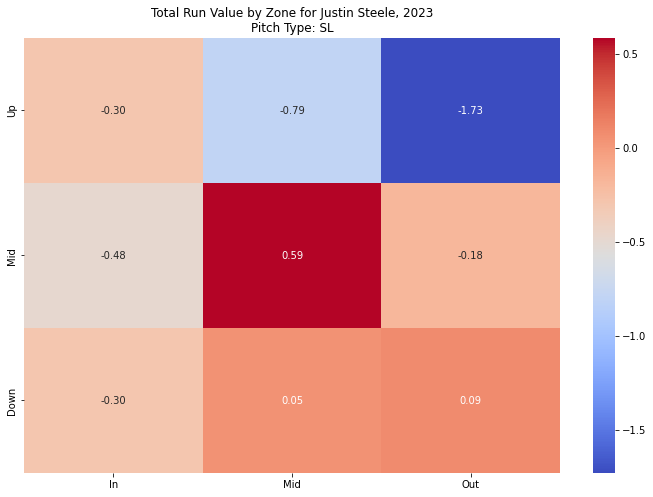

In [28]:
# Create figure for each pitch type
for pitch_type in pitch_types:
    filtered_values = pitches[pitches['pitch_type'] == pitch_type].groupby('zone')['delta_run_exp'].sum()
    
    if len(filtered_values) > 0:
        zone_matrix = filtered_values[1:10].values.reshape((3,3))

        zone_matrix = zone_matrix.T

        if not np.isnan(zone_matrix).any():
            plt.figure(figsize=(12,8))
            sns.heatmap(zone_matrix, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=['In', 'Mid', 'Out'], yticklabels=['Up', 'Mid', 'Down'])
            plt.title(f'Total Run Value by Zone for Justin Steele, 2023\nPitch Type: {pitch_type}')
            plt.show()

In [37]:
# Filter pitches for only fastballs
fastball = pitches[pitches['pitch_type'] == 'FF']

# Filter for sliders
sliders = pitches[pitches['pitch_type'] == 'SL']

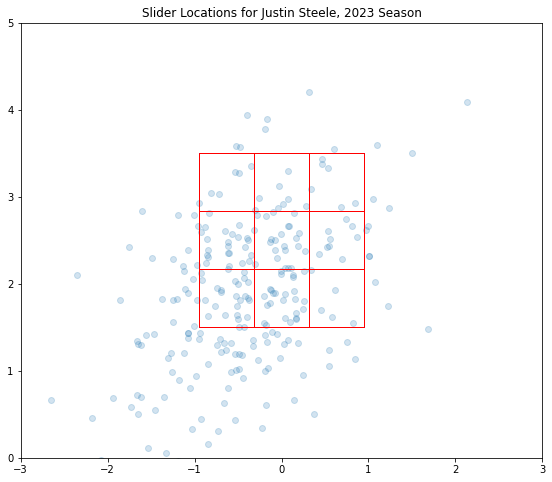

In [46]:
# Fastball scatter plot
plt.figure(figsize=(12,8))
plt.scatter(sliders['plate_x'], sliders['plate_z'], alpha=0.2)

# Create strike zone
strike_zone_ff = plt.Rectangle((-0.95, 1.5), 1.9, 2, fill = False, color='blue')
plt.gca().add_patch(strike_zone_ff)

# Create Statcast Zones
statcast_zones_ff = [plt.Rectangle((-0.95 + (i % 3) * 0.633, 1.5 + (i // 3) * 0.667), 0.633, 0.667, fill=False, color='red') for i in range(9)]
for zone in statcast_zones_ff:
    plt.gca().add_patch(zone)

plt.title("Slider Locations for Justin Steele, 2023 Season")
plt.xlabel('')
plt.ylabel('')
plt.xlim(-3,3)
plt.ylim(0, 5)
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()
